In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Définition du problème:

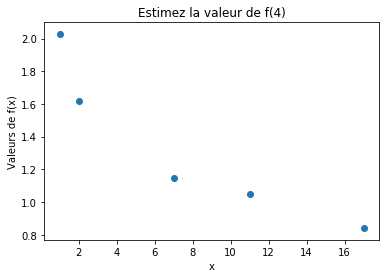

In [2]:
x = [1,2,7,11,17]
fx = [2.02483571, 1.61759158, 1.14796408, 1.05027089, 0.84315297] #f(x)

plt.scatter(x, fx)
plt.ylabel("Valeurs de f(x)")
plt.xlabel("x")
plt.title("Estimez la valeur de f(4)")
plt.show()

On sait que f est de la forme <font size = 5 > $f(x)=\frac{ \beta}{x^\alpha}$</font>, $\alpha$ et $\beta$ à déterminer.

Dans votre jeu de données, vous disposez des valeurs de f(x) pour certaines valeurs de x (1,2,7,11,17).

Trouvez des valeurs plausibles pour $\alpha$ et $\beta$. Puis déterminez la valeur de f(4).

## Résolution

### Définition des fonctions

In [3]:
def fab(t, ab):
    # input : t, ab est ici le couple de paramètres (alpha, beta)
    # output : f(t), avec alpha = ab[0] et beta = ab[1]
    # avec alpha = 1 et beta = 2 au point x = 1
    return ab[1]/(t**ab[0])

# par exemple, fab(1,(2,3)) retourne 3/1² = 3
# print(fab(1,(2,3)))

def F(ab):
    # la fonction à minimiser
    return sum([(fx[i] - fab(x[i], ab))**2 for i in range(len(x))])

### Minimisation

In [4]:
alpha_min, beta_min = minimize(F, x0=(0,2.5))['x']
minimize(F, x0=(0,2.5))

      fun: 0.004839900763815356
 hess_inv: array([[0.05008846, 0.09250532],
       [0.09250532, 0.37715111]])
      jac: array([ 7.10249878e-07, -2.33470928e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([0.29103498, 2.01264793])

### Résultats

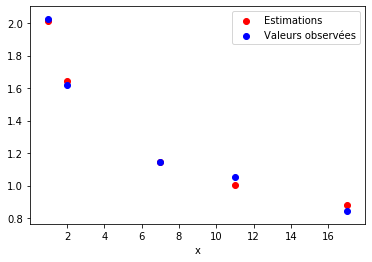

In [5]:
def f_estimee(t):
    return fab(t,(alpha_min, beta_min))

plt.scatter(x, 
            [f_estimee(k) for k in x], 
            c='red', 
            label='Estimations')
plt.scatter(x, 
            fx, 
            c='blue', 
            label='Valeurs observées')
plt.legend()
plt.xlabel('x')
plt.show()

In [6]:
f_estimee(4)

1.344458175802727

### Génération des valeurs initiales

In [7]:
indices = [1,2,7,11,17]

alpha = 0.3
beta = 2

# Pour obtenir les mêmes résultats après deux lancers, on fixe la séquence de nombres pseudo-aléatoire tirée
np.random.seed(42)

erreur = np.random.normal(0,0.05,len(indices))
np.array([beta/(k**alpha) for k in [1,2,7,11,17]])+erreur

array([2.02483571, 1.61759158, 1.14796408, 1.05027089, 0.84315297])

On retrouve bien les valeurs utilisées pour générer la série!